Construct the confusion matrix based on the following data (without using Scikit-Learn).

In [12]:
import numpy as np

true_value = np.array(['A', 'B', 'A', 'C', 'C', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'C', 'C', 'B'])
predict_value = np.array(['A', 'A', 'C', 'C', 'B', 'B', 'A', 'A', 'A', 'C', 'A', 'A', 'C', 'C', 'B'])

Get the unique labels, used for replacement

In [13]:
unique_labels = np.unique(true_value).tolist()
print("Unique Labels:", unique_labels)

Unique Labels: ['A', 'B', 'C']


Iterate to replace the labels

In [14]:
for i in range(len(unique_labels)):
    true_value[true_value == unique_labels[i]] = i
    predict_value[predict_value == unique_labels[i]] = i

Convert them to integer

In [15]:
true_value = np.array(true_value, dtype=int)
predict_value = np.array(predict_value, dtype=int)
print("True Value:", true_value)
print("Predict Value:", predict_value)

True Value: [0 1 0 2 2 1 0 0 0 1 1 2 2 2 1]
Predict Value: [0 0 2 2 1 1 0 0 0 2 0 0 2 2 1]


Construct the confusion matrix

In [16]:
confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)))
print(confusion_matrix)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [17]:
unique_labels = np.unique(true_value).tolist()

tp = []
for j in range(len(unique_labels)):
    tp_count = 0
    for k in range(len(true_value)):
        # Catch the true positive
        if true_value[k] == j and predict_value[k] == j:
            tp_count += 1  # Count and then append
        # Finally, count the remaining entries
        elif true_value[k] == j and predict_value[k] != j:
            confusion_matrix[true_value[k], predict_value[k]] += 1
    # Substitute the tp to the diagonal entry
    confusion_matrix[j, j] = tp_count
   

print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[4. 0. 1.]
 [2. 2. 1.]
 [1. 1. 3.]]


In [18]:
def get_components(confusion_matrix, k):
    tp = confusion_matrix[k, k]
    fp = confusion_matrix[:, k].sum() - tp
    fn = confusion_matrix[k, :].sum() - tp
    tn = confusion_matrix.sum() - (tp + fp + fn)
    return tp, fp, fn, tn

In [19]:
for i in unique_labels:
    print("Label", i)
    tp, fp, fn, tn = get_components(confusion_matrix, i)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = (2 * recall * precision) / (recall + precision)
    print(f"TP: {tp}; FP: {fp}; FN: {fn}; TN: {tn}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")
    print(f"F1 Score: {f1_score}")
    print()

Label 0
TP: 4.0; FP: 3.0; FN: 1.0; TN: 7.0
Accuracy: 0.7333333333333333
Precision: 0.5714285714285714
Recall: 0.8
Specificity: 0.7
F1 Score: 0.6666666666666666

Label 1
TP: 2.0; FP: 1.0; FN: 3.0; TN: 9.0
Accuracy: 0.7333333333333333
Precision: 0.6666666666666666
Recall: 0.4
Specificity: 0.9
F1 Score: 0.5

Label 2
TP: 3.0; FP: 2.0; FN: 2.0; TN: 8.0
Accuracy: 0.7333333333333333
Precision: 0.6
Recall: 0.6
Specificity: 0.8
F1 Score: 0.6



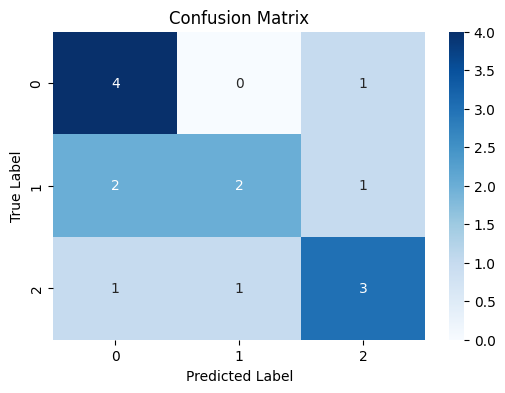

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", 
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
correct_prediction = sum([confusion_matrix[k, k] for k in unique_labels])
samples = confusion_matrix.sum()
print(f"Overall Accuracy:", correct_prediction / samples)

# Some lists to store the result
accuracy_k = []
precision_k = []
recall_k = []
f1_score_k = []

for i in unique_labels:
    tp, fp, fn, tn = get_components(confusion_matrix, i)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = (2 * recall * precision) / (recall + precision)
    # Append the result
    accuracy_k.append(accuracy)
    precision_k.append(precision)
    recall_k.append(recall)
    f1_score_k.append(f1_score)

# Find the macro-metrics
n = len(accuracy_k)  # Assume the length for all these lists are the same
print(f"Macro Accuracy: {sum(accuracy_k) / n}")
print(f"Macro Precision: {sum(precision_k) / n}")
print(f"Macro Recall: {sum(recall_k) / n}")
print(f"Macro F1 Score: {sum(f1_score_k) / n}")

Overall Accuracy: 0.6
Macro Accuracy: 0.7333333333333333
Macro Precision: 0.6126984126984127
Macro Recall: 0.6000000000000001
Macro F1 Score: 0.5888888888888889
